## CS4243 Lab 1: Template Matching

**ASSIGNMENT SUBMISSION DEADLINE: Feb. 03, 23:59**

**Instructions:**
- See `lab1.pdf` and `lab1.py` for detailed descriptions.

- The functions to be implemented are given in `lab1.py`, with a description of each function. You will need to fill in the code where it is marked with the following:
    ```
    """ Your code starts here """

    """ Your code ends here """
    ```
- For open questions, write your answers directly into the notebook. 

- The test images are given in folder `data/input`.

- You are free to use NumPy functions, but you may not use `numpy.pad()` or other built-in functions of OpenCV aside from those already in the code template.


**Attention:**
- Please be careful about the data type of the image!
- Please use python with version >= 3.8.4, and install the libs provided in requirements.txt via `pip install -r requirements.txt`.
- Please do not change the structure of files in the whole folder of this assignment, otherwise TA may mark your code wrongly.
- Please do not change the input arguments of the functions in `lab1.py`, otherwise your implementation would fail to pass the test.
- Except for the input parameters of `non_maximum_suppression()`, please do not change other codes in this notebook.

**Submission instructions:**

After you finish the code and get all the results: 

- Re-run this notebook (and make sure you get all the clean outputs), 
    
- Zip the same folder back and name it with your student ID (e.g. A0123456H.zip or A0123456H_A2345678J.zip if you are a group of 2), and 
    
- Submit to the NUS Canvas system. Please be careful since any failure to follow the submission guideline will result in a grade deduction.
    
If you have any question regarding this lab, do not hesistate to ask questions under the Labs section on Canvas Discussions. You can also attend any lab slot for FAQs.

## Part 1: Image preprossessing (15%)

**Goal**: Implement following functions and then run the code cells below.
- `rgb2gray()`: **(5%)**
- `gray2grad()`: **(5%)**
- `pad_zeros()`: **(5%)**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Relative error of gray2grad() (<1e-8 will be fine): 8.49410674999072e-12


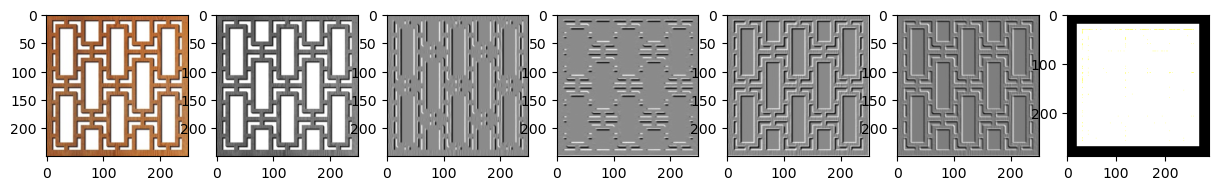

In [117]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'rectangular.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))

# RGB image to grayscale image
img_gray = lab1.rgb2gray(img)
# Grayscale image to gradient image
img_grad_h, img_grad_v, img_grad_d1, img_grad_d2 = lab1.gray2grad(img_gray)
# Padding
img_pad = lab1.pad_zeros(img, 20, 20, 20, 20)

lab1.show_imgs([img, img_gray, img_grad_h, img_grad_v, img_grad_d1, img_grad_d2, img_pad])

# For evaluation purpose
sobelh = np.array([[-1, 0, 1], 
                   [-2, 0, 2], 
                   [-1, 0, 1]], dtype = float)
img_grad_h_cv2 = cv2.filter2D(img_gray.astype(float), -1, cv2.flip(sobelh, -1), borderType=cv2.BORDER_CONSTANT)
print('Relative error of gray2grad() (<1e-8 will be fine):', np.linalg.norm(img_grad_h - img_grad_h_cv2))

## Part 2: Normalized Cross-Correlation (30%)

**Goal**: Implement following functions and then run the code cells below.
- `normalized_cross_correlation()`: **(10%)**
- `normalized_cross_correlation_fast()`: **(10%)**
- `normalized_cross_correlation_matrix()`: **(10%)**

Runtime of normalized_cross_correlation(): 16.881496s
Runtime of normalized_cross_correlation_fast(): 0.770944s
Runtime of normalized_cross_correlation_matrix(): 0.436681s
Relative error of normalized_cross_correlation() (<1e-4 will be fine): 1.2064776735109752e-05
Relative error of normalized_cross_correlation_fast() (<1e-4 will be fine): 1.2064776735010986e-05
Relative error of normalized_cross_correlation_matrix() (<1e-4 will be fine): 1.2064776744159675e-05


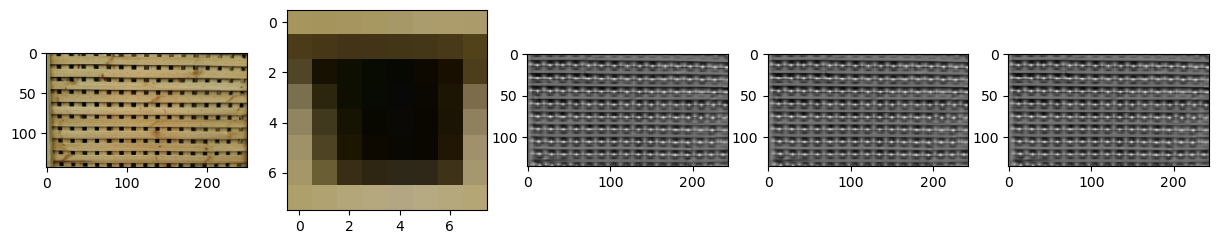

In [147]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'lattice.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5) # downsample the input image to save computation cost
template = img[14:22, 12:20]

t1 = time.time()
response = lab1.normalized_cross_correlation(img, template)
t2 = time.time()
response_fast = lab1.normalized_cross_correlation_fast(img, template)
t3 = time.time()
response_matrix = lab1.normalized_cross_correlation_matrix(img, template)
t4 = time.time()

print('Runtime of normalized_cross_correlation(): %fs'%(t2-t1))
print('Runtime of normalized_cross_correlation_fast(): %fs'%(t3-t2))
print('Runtime of normalized_cross_correlation_matrix(): %fs'%(t4-t3))


lab1.show_imgs([img, template, response, response_fast, response_matrix])
# For evaluation purpose
response_cv2 = cv2.matchTemplate(img, template, cv2.TM_CCORR_NORMED)
print('Relative error of normalized_cross_correlation() (<1e-4 will be fine):', np.linalg.norm(response - response_cv2))
print('Relative error of normalized_cross_correlation_fast() (<1e-4 will be fine):', np.linalg.norm(response_fast - response_cv2))
print('Relative error of normalized_cross_correlation_matrix() (<1e-4 will be fine):', np.linalg.norm(response_matrix - response_cv2))

## Part 3: Non-maximum Suppression (10%)

**Goal**: Implement following functions and then run the code cells below.
- `non_max_suppression()`

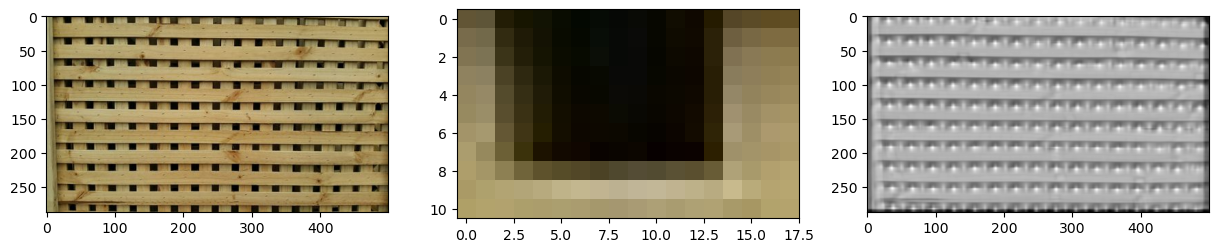

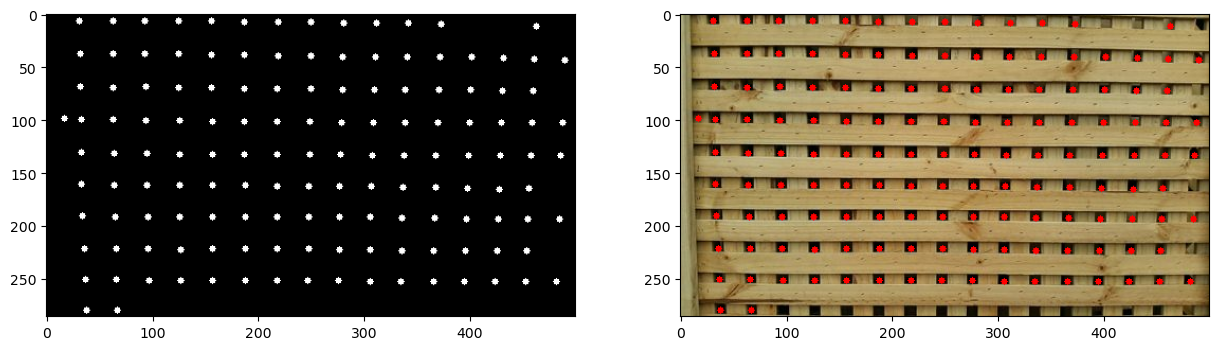

In [146]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'lattice.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[33:44, 24:42]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

# perform template matching
response = lab1.normalized_cross_correlation_fast(img_pad, template)

lab1.show_imgs([img, template, response])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res, img_ori=img)

## Part 4: Study on Template Matching (45%)

### 4.1 Image Inputs (5%)
No question in this part. You will get full marks if you achieve similar results.

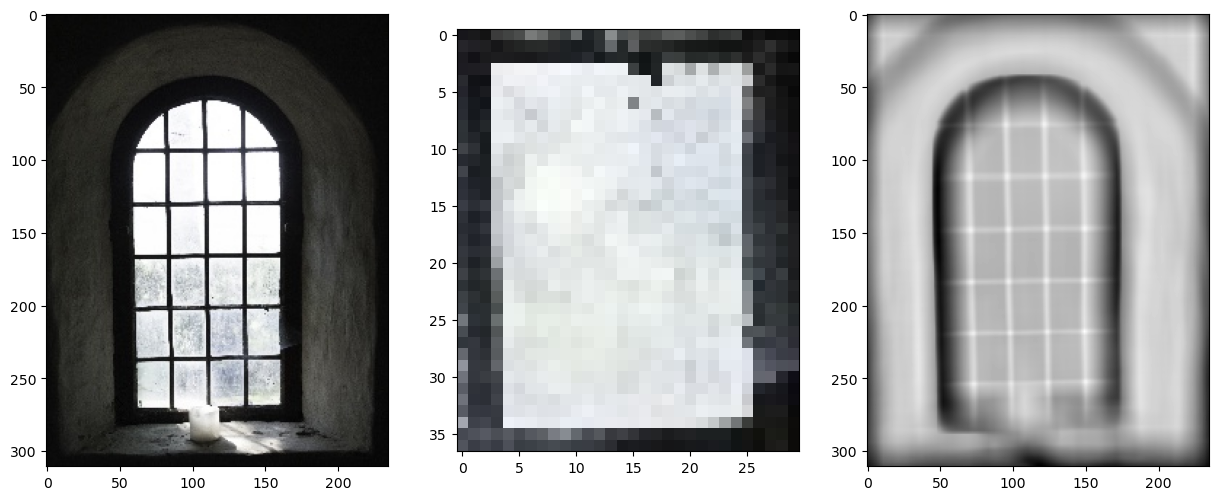

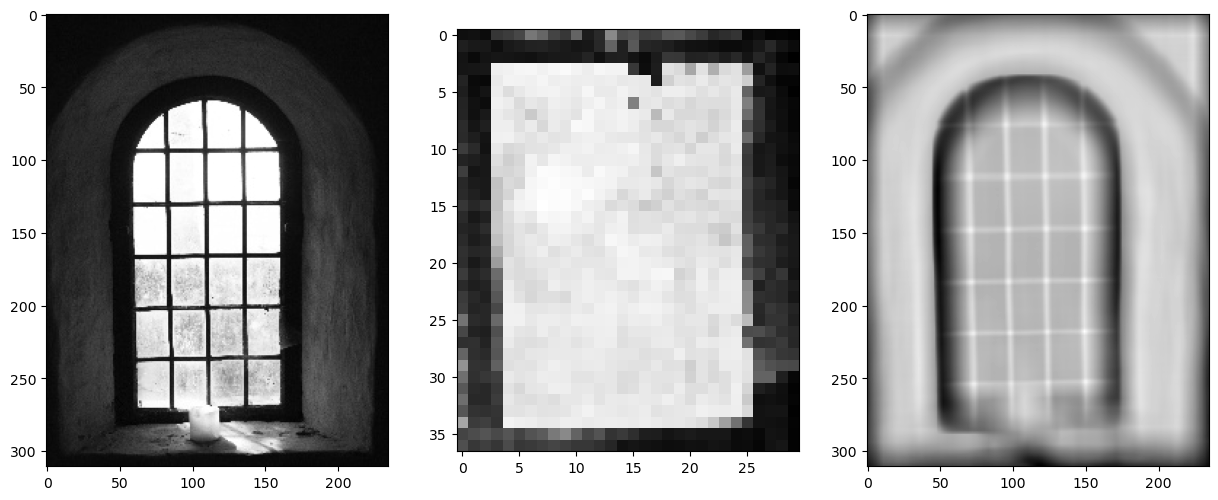

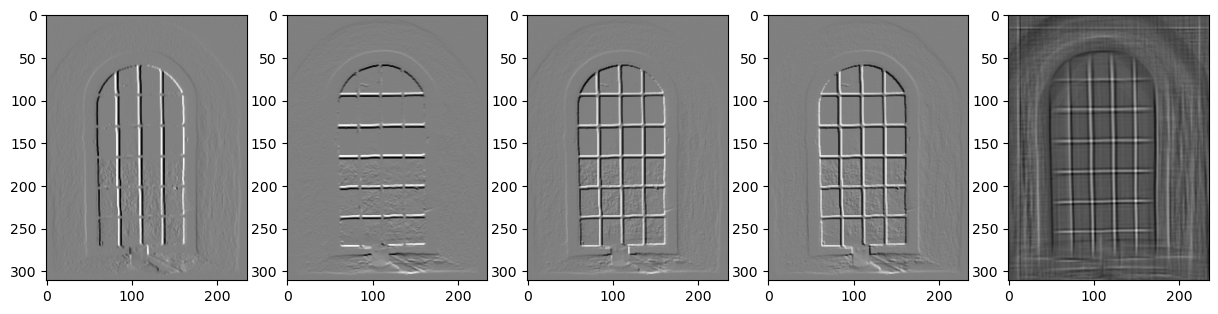

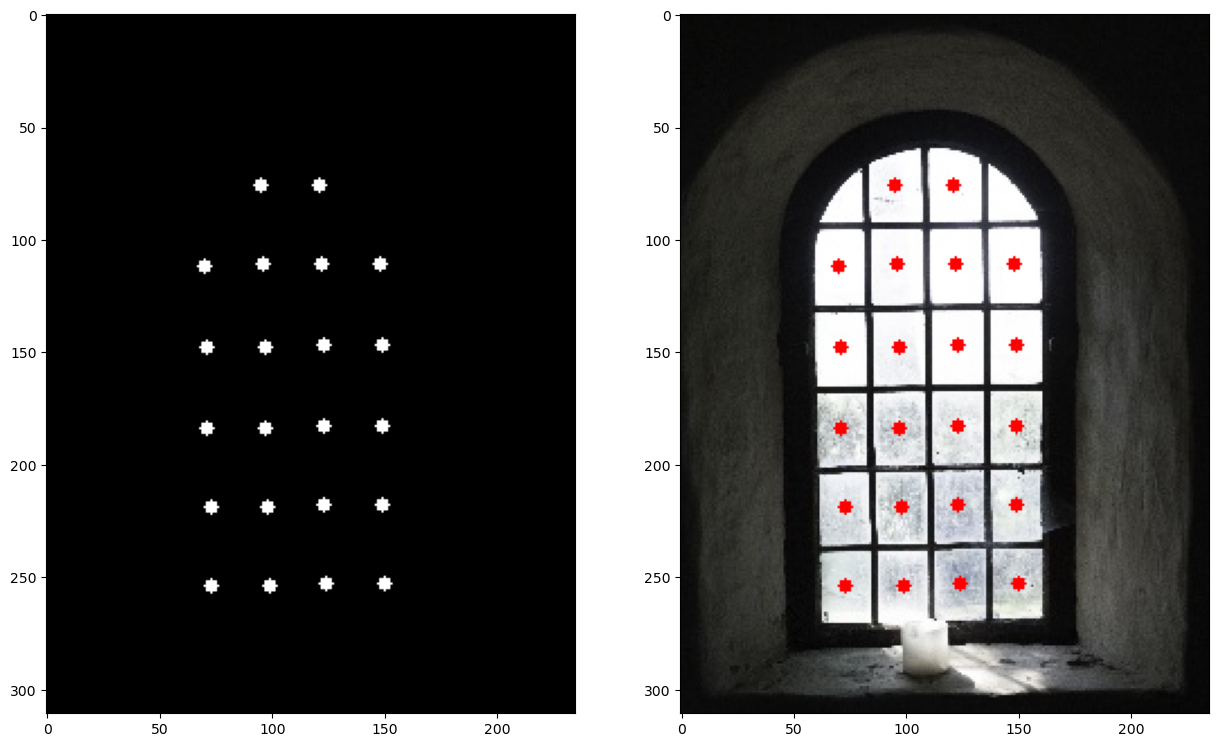

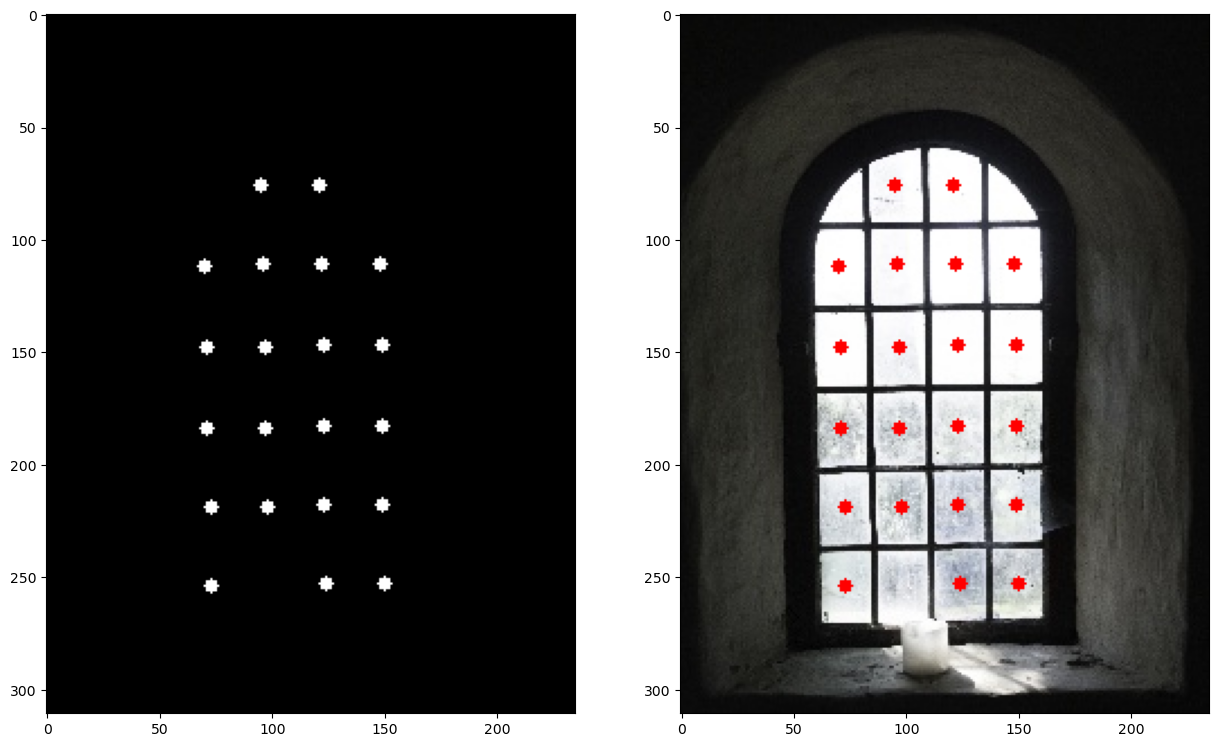

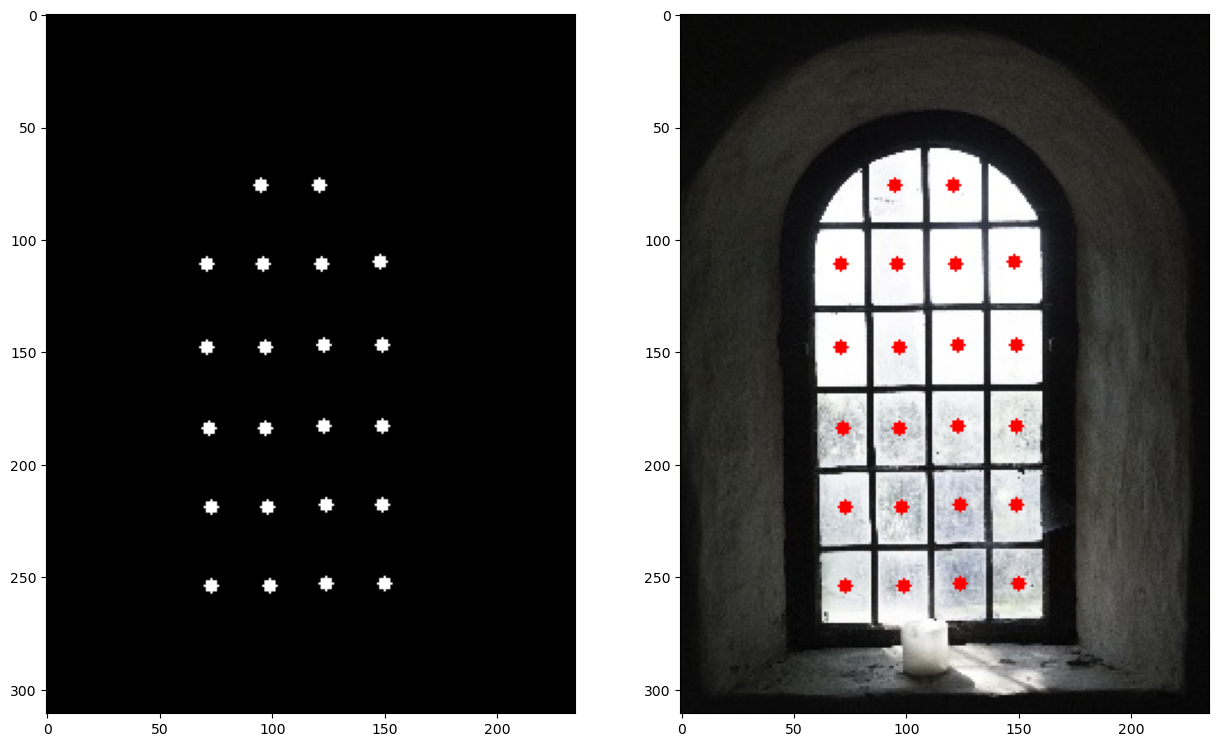

In [145]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import importlib
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'window.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
top, bottom, left, right = 200, 237, 135, 165
template = img[top:bottom, left:right]

# RGB to grayscale
img_gray = lab1.rgb2gray(img)
template_gray = lab1.rgb2gray(template)

# RGB to grayscale
img_gray = lab1.rgb2gray(img)
template_gray = img_gray[top:bottom, left:right]

# RGB to gradient map
img_grad_h, img_grad_v, img_grad_d1, img_grad_d2 = lab1.gray2grad(img_gray)
img_grad = np.stack([img_grad_h, img_grad_v, img_grad_d1, img_grad_d2], -1)
template_grad = img_grad[top:bottom, left:right]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
img_gray_pad = lab1.pad_zeros(img_gray, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
img_grad_pad = lab1.pad_zeros(img_grad, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)


# perform match template
response = lab1.normalized_cross_correlation_fast(img_pad, template)
response_gray = lab1.normalized_cross_correlation_fast(img_gray_pad, template_gray)
response_grad = lab1.normalized_cross_correlation_fast(img_grad_pad, template_grad)



lab1.show_imgs([img, template, response])
lab1.show_imgs([img_gray, template_gray, response_gray])
lab1.show_imgs([img_grad[:,:,0], img_grad[:,:,1], img_grad[:,:,2], img_grad[:,:,3], response_grad])

# !!! Adjust the suppress range or threshold if you fail to detect 4x5 repetitive patterns in the image for RGB and grayscale inputs
res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.93)
lab1.show_img_with_points(res, img_ori=img)

res_gray = lab1.non_max_suppression(response_gray, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.94)
lab1.show_img_with_points(res_gray, img_ori=img)

res_grad = lab1.non_max_suppression(response_grad, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.5)
lab1.show_img_with_points(res_grad, img_ori=img)

### 4.2 Template Inputs (6%)

**QUESTION**: Explain why their response positions are different. **(6%)**

**ANSWER**: The response positions are different since we're using different templates that correspond to different patterns located in different positions in the original image. After normalized cross correlation and finding local maxima, we will retrieve the positions where these patterns were originally located in the original image.

For example, the first template used resembles the long empty rectangle which features in 8 parts of the image, whereas the next two correspond to the parts vertically squished between rectangles, and the parts just below the bottom left of the rectangles respectively. The response positions correspond to where the patterns are found.

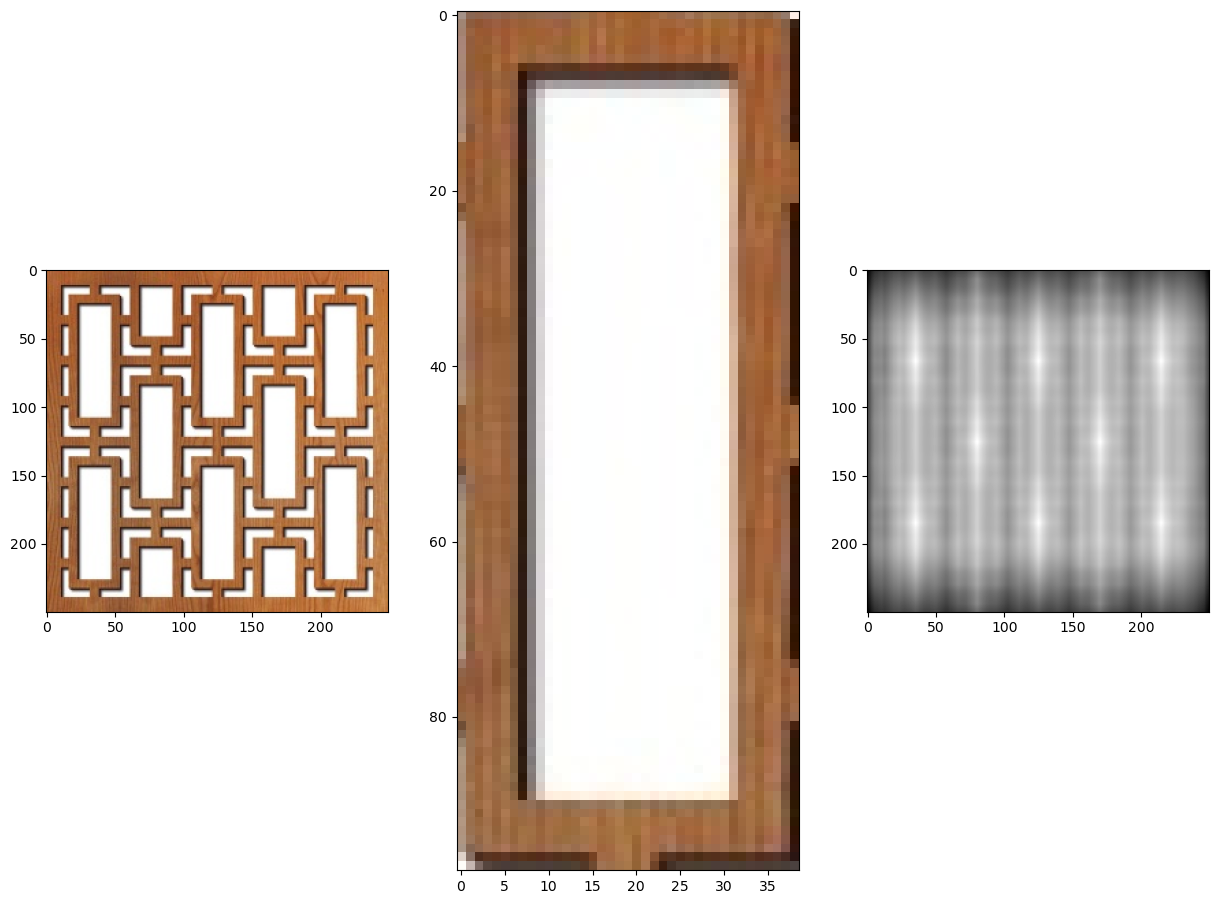

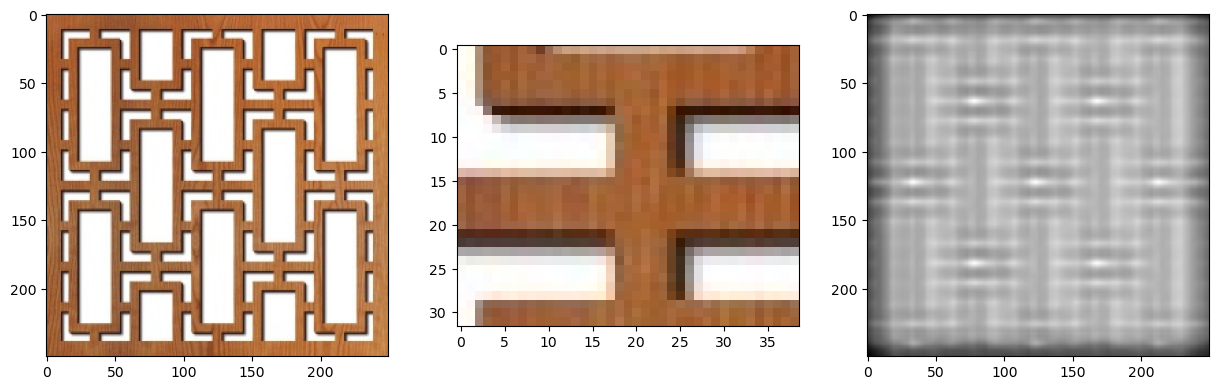

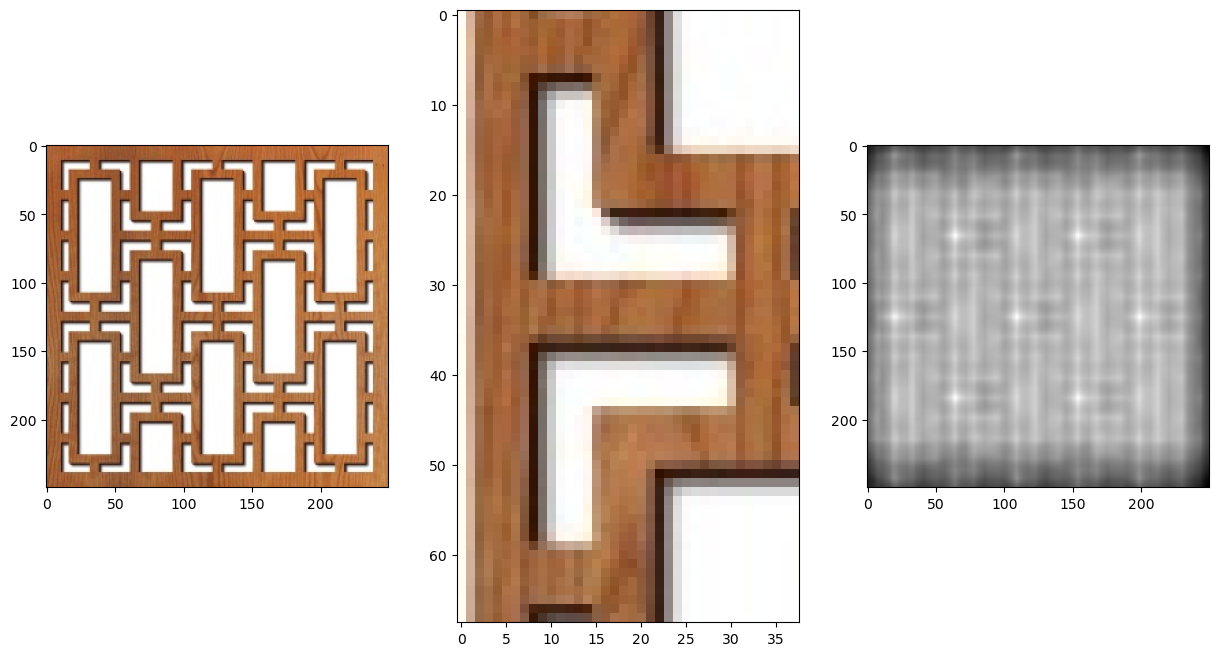

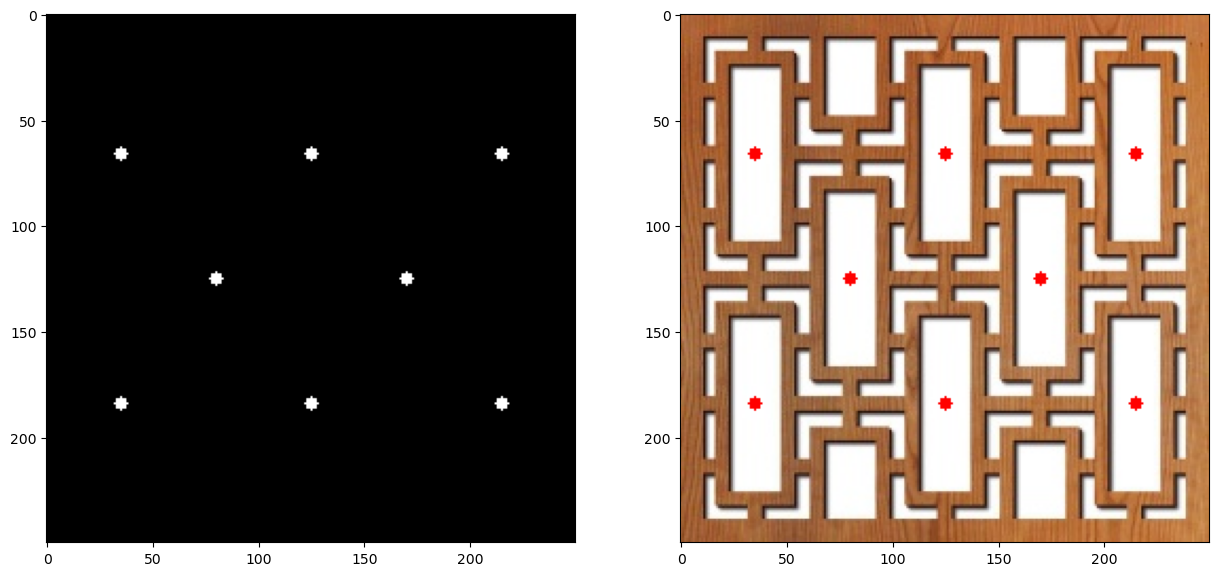

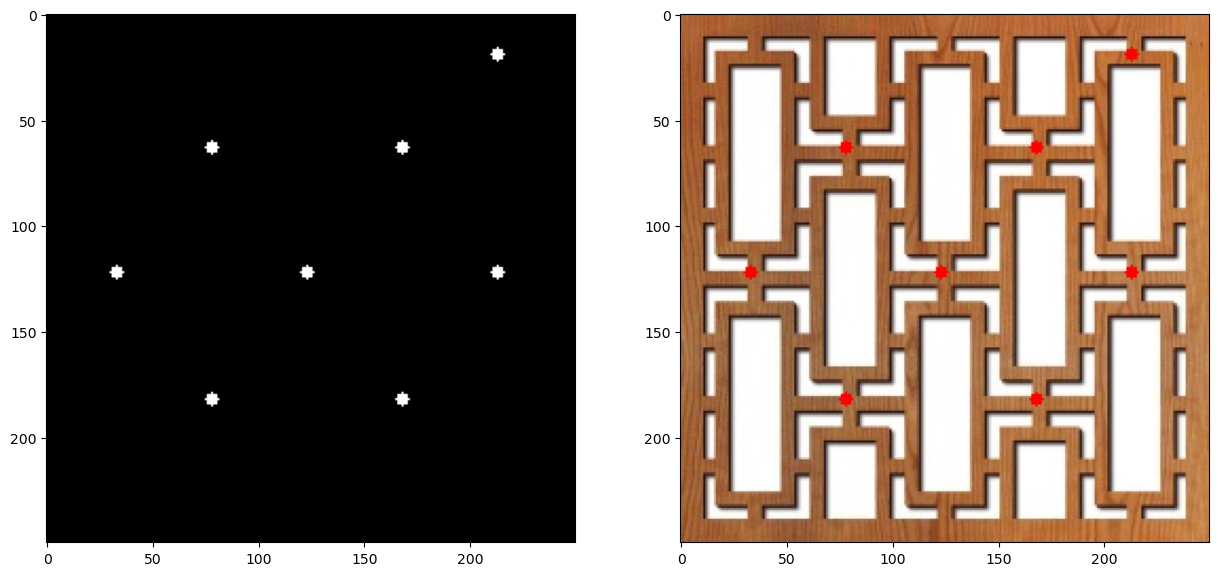

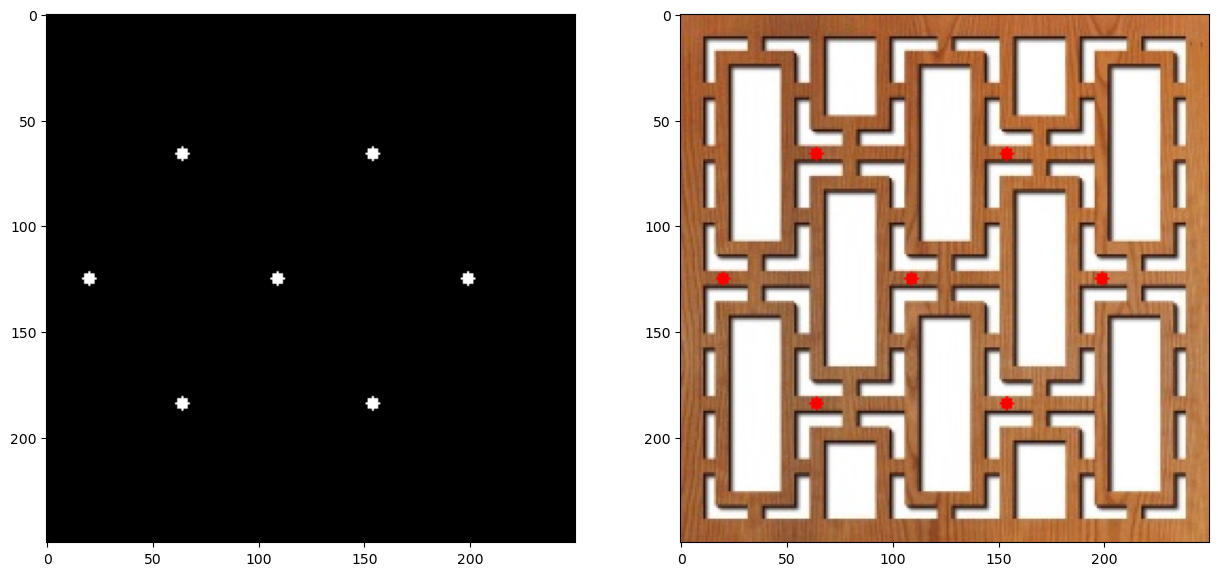

In [148]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)


data_dir = 'inputs'
filename = 'rectangular.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[77:175, 61:100]
template2 = img[48:80, 59:98]
template3 = img[92:160, 91:129]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
# perform match template
response = lab1.normalized_cross_correlation_fast(img_pad, template)


# pad zeros to the image
pad_height_bef, pad_height_aft = template2.shape[0] // 2 - (1 if template2.shape[0] % 2 == 0 else 0), template2.shape[0] // 2
pad_width_bef, pad_width_aft = template2.shape[1] // 2 - (1 if template2.shape[1] % 2 == 0 else 0), template2.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
# perform match template
response2 = lab1.normalized_cross_correlation_fast(img_pad, template2)


# pad zeros to the image
pad_height_bef, pad_height_aft = template3.shape[0] // 2 - (1 if template3.shape[0] % 2 == 0 else 0), template3.shape[0] // 2
pad_width_bef, pad_width_aft = template3.shape[1] // 2 - (1 if template3.shape[1] % 2 == 0 else 0), template3.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
# perform match template
response3 = lab1.normalized_cross_correlation_fast(img_pad, template3)

lab1.show_imgs([img, template, response])
lab1.show_imgs([img, template2, response2])
lab1.show_imgs([img, template3, response3])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res, img_ori=img)

res2 = lab1.non_max_suppression(response2, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res2, img_ori=img)

res3 = lab1.non_max_suppression(response3, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res3, img_ori=img)

### 4.3 Template Size (6%）

**QUESTION**: How can each of these templates detect every hole present in the input image? **(2%)**

**ANSWER**: By using templates of just 1 hole, 3 holes vertically or horizontally, or 9 holes in a 3 by 3 grid, these templates match up with the input image's grid of holes, and if we exclude the holes on the borders, all of them are capable of detecting the holes present in the images.

**QUESTION**: Analyze and explain the subtle differences in the output borders. **(2%)**

**ANSWER**: 

- The 1 hole template can detect all holes.
- The 3 holes vertically cannot match with holes on the top and bottom row since the holes needed to match these would be outside the border of the image (above and below the image)
- The 3 holes horizontally cannot match with holes on the left and right-most rows of the iamge since the holes needed for matching would be similarly outside the borders of the image (on the left and right of the image)
- The 9 holes template cannot match with any of the holes on the border since they would be missing some holes needed for matching, on all sides of the image.


**QUESTION**: Describe the correlation output with templates with a 1x1.5 or a 1x2 array of holes. **(2%)**

**ANSWER**: With a 1x1.5 template or 1x2 template, assuming the templates are centered in between two holes, we would be detecting the gap sandwiched between two holes horizontally. The output would therefore give us responses whenever there is a gap between two holes side-by-side horizontally present in the image.

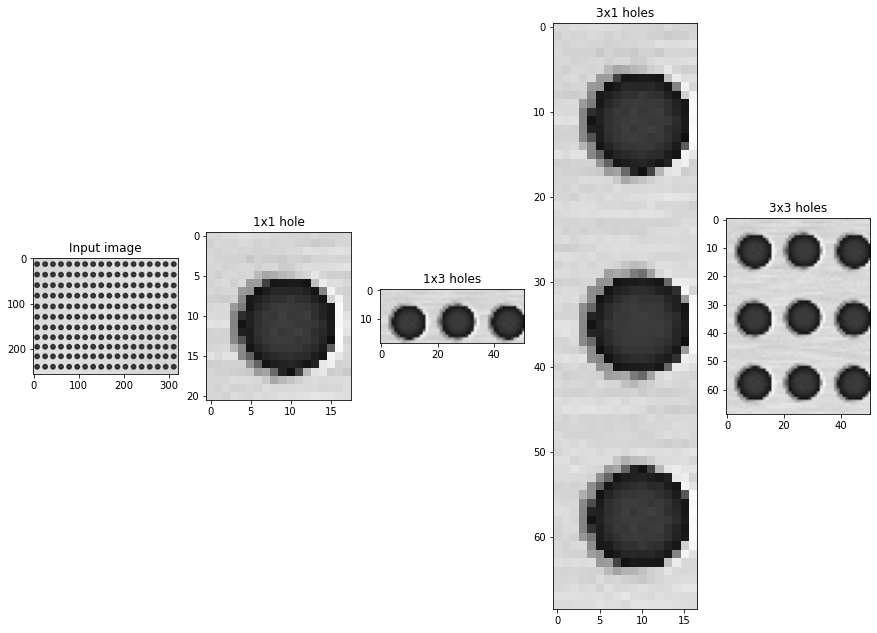

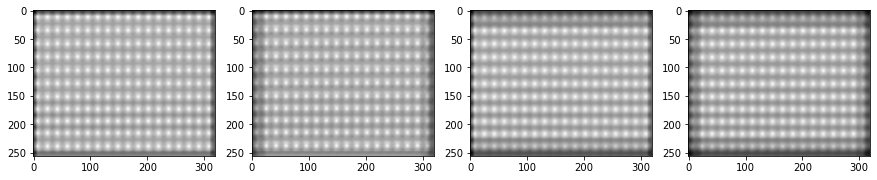

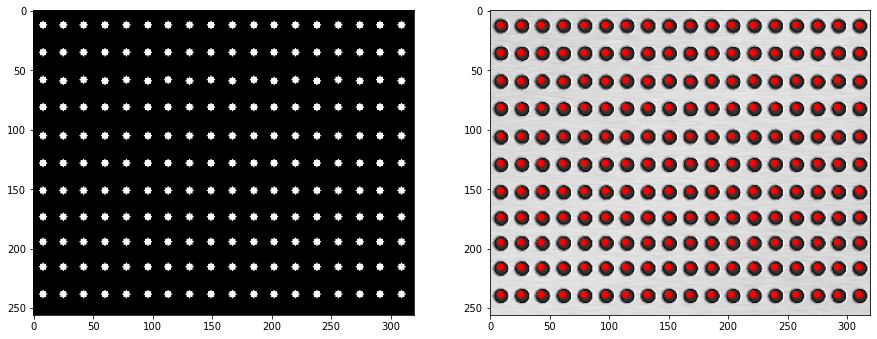

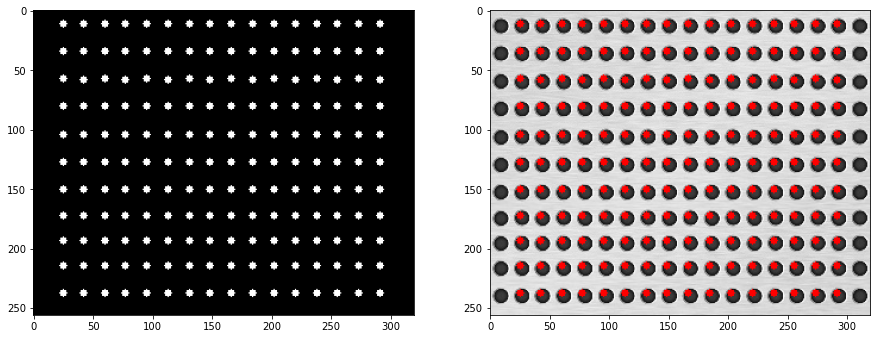

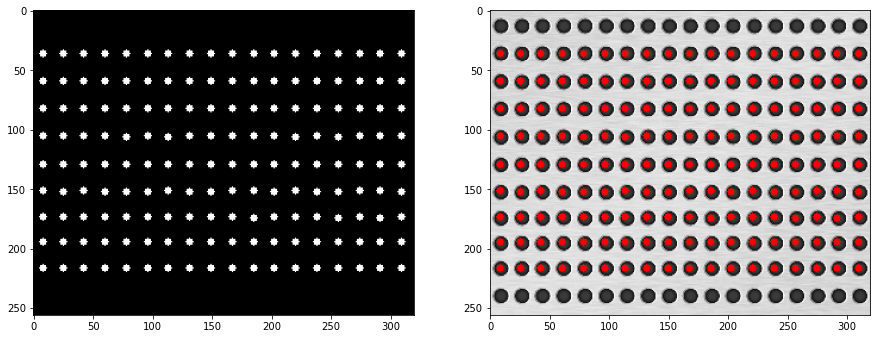

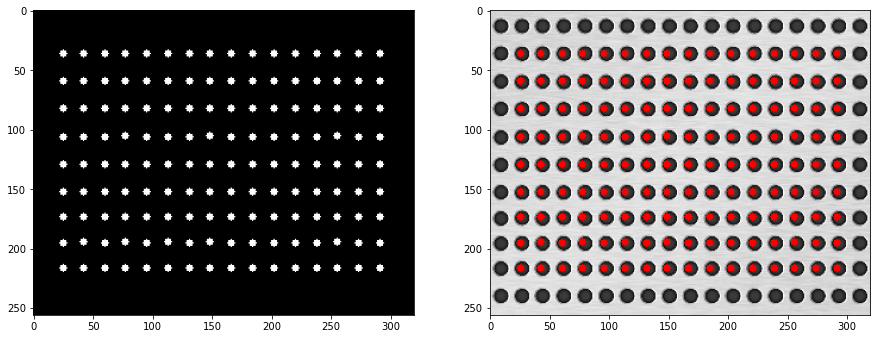

In [6]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import random
import lab1
importlib.reload(lab1)
random.seed(0)


data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[25:46, 17:35]
template2 = img[25:44, 17:68]
template3 = img[25:94, 17:34]
template4 = img[25:94, 17:68]


# Template 1x1
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response = lab1.normalized_cross_correlation_fast(img_pad, template)

# Template 1x3
pad_height_bef, pad_height_aft = template2.shape[0] // 2 - (1 if template2.shape[0] % 2 == 0 else 0), template2.shape[0] // 2
pad_width_bef, pad_width_aft = template2.shape[1] // 2 - (1 if template2.shape[1] % 2 == 0 else 0), template2.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response2 = lab1.normalized_cross_correlation_fast(img_pad, template2)

# Template 3x1
pad_height_bef, pad_height_aft = template3.shape[0] // 2 - (1 if template3.shape[0] % 2 == 0 else 0), template3.shape[0] // 2
pad_width_bef, pad_width_aft = template3.shape[1] // 2 - (1 if template3.shape[1] % 2 == 0 else 0), template3.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response3 = lab1.normalized_cross_correlation_fast(img_pad, template3)

# Template 3x3
pad_height_bef, pad_height_aft = template4.shape[0] // 2 - (1 if template4.shape[0] % 2 == 0 else 0), template4.shape[0] // 2
pad_width_bef, pad_width_aft = template4.shape[1] // 2 - (1 if template4.shape[1] % 2 == 0 else 0), template4.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response4 = lab1.normalized_cross_correlation_fast(img_pad, template4)

lab1.show_imgs([img, template, template2, template3, template4], titles=['Input image', '1x1 hole', '1x3 holes', '3x1 holes', '3x3 holes'])
lab1.show_imgs([response, response2, response3, response4])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res, img_ori=img)

res2 = lab1.non_max_suppression(response2, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res2, img_ori=img)

res3 = lab1.non_max_suppression(response3, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res3, img_ori=img)

res4 = lab1.non_max_suppression(response4, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res4, img_ori=img)

### 4.4 Mean-subtracted cross correlation (16%)

**Goal**: Implement following functions and then run the code cells below.
- `normalized_cross_correlation_ms()`: **(10%)**

**QUESTION**: What are the benefits of subtracting the mean? **(6%)**

**ANSWER**:  

Relative error of normalized_cross_correlation() (<1e-4 will be fine): 2.82452704124121e-05
Relative error of normalized_cross_correlation_ms() (<1e-3 will be fine): 0.00014167735128169098


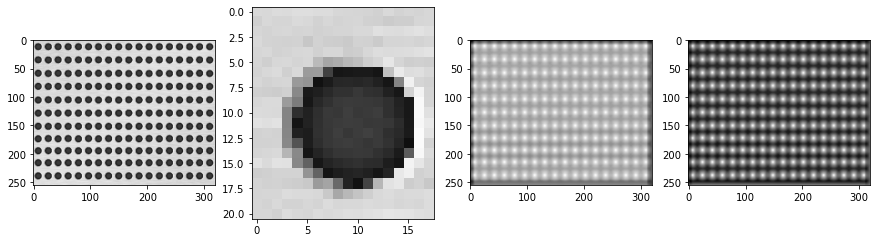

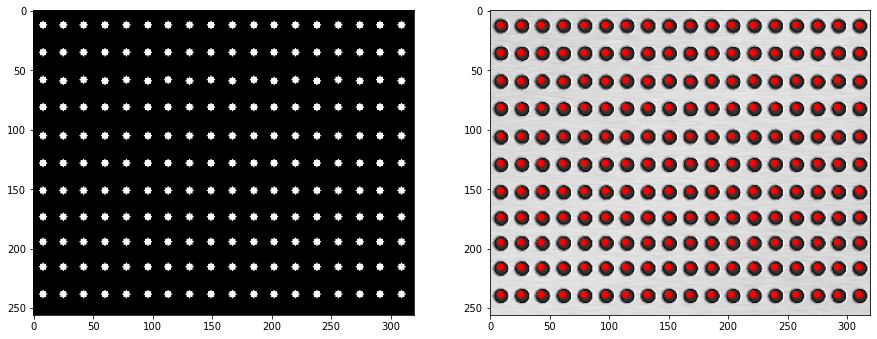

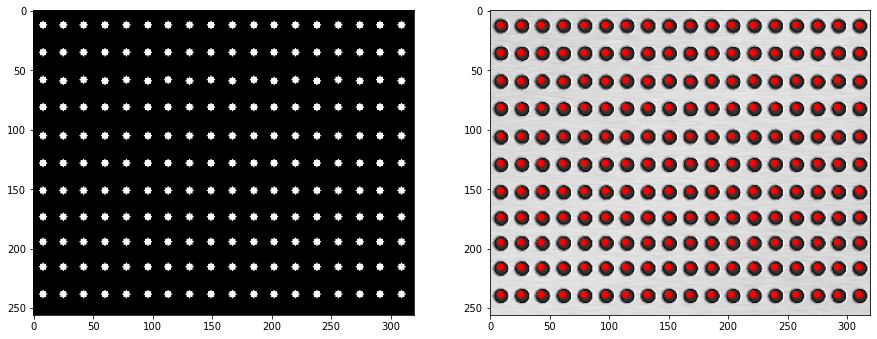

In [7]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[25:46, 17:35]


# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = lab1.normalized_cross_correlation_fast(img_pad, template)
response_ms = lab1.normalized_cross_correlation_ms(img_pad, template)

lab1.show_imgs([img, template, response, response_ms])

response_cv2 = cv2.matchTemplate(img_pad, template, cv2.TM_CCORR_NORMED)
response_cv2_ms = cv2.matchTemplate(img_pad, template, cv2.TM_CCOEFF_NORMED)
print('Relative error of normalized_cross_correlation() (<1e-4 will be fine):', np.linalg.norm(response - response_cv2))
print('Relative error of normalized_cross_correlation_ms() (<1e-3 will be fine):', np.linalg.norm(response_ms - response_cv2_ms))

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res, img_ori=img)
res_ms = lab1.non_max_suppression(response_ms, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.5)
lab1.show_img_with_points(res_ms, img_ori=img)

### 4.5 Auto-Correlation (6%)

**QUESTION**: Explain why the correlation output responses decrease as one gets further away from the center of the output. **(6%)**

**ANSWER**:  In this case, the template is exactly the same as the image, although the image is zero-padded. This results in a perfect match when we're near the center, and then gradually less similar matches whenever we shift one hole towards the outside, since some of the holes nearer the borders would no longer match when we shift away from the center. Hence, the correlation output responses will correspondingly decrease.

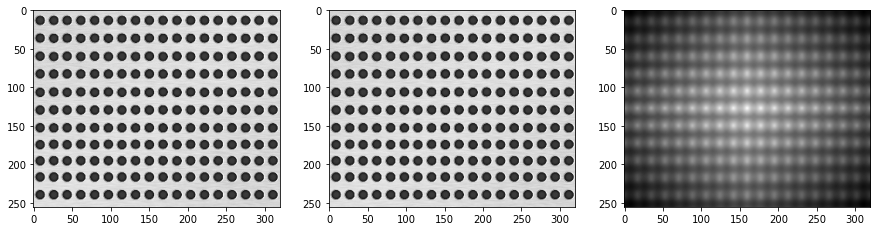

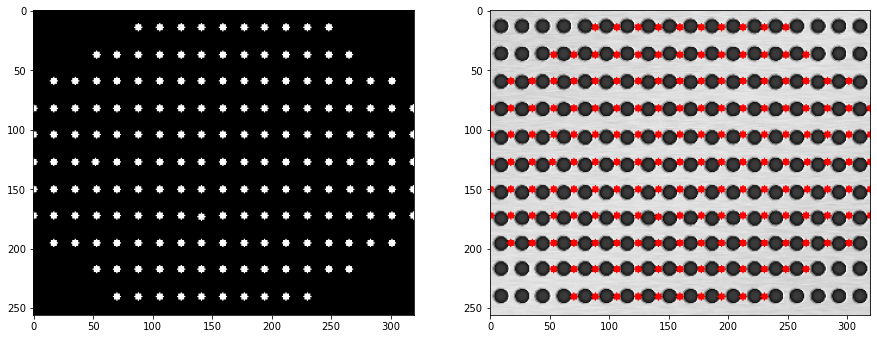

In [8]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img.copy()

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = cv2.matchTemplate(img_pad, template, cv2.TM_CCORR_NORMED)
lab1.show_imgs([img, template, response])

res = lab1.non_max_suppression(response, (13, 13), threshold=0.6)
lab1.show_img_with_points(res, img_ori=img)

### 4.6 Limitations (6%)

**QUESTION**: Observe the outputs and explain why template matching fails in certain regions of the image. **(6%)**

**ANSWER**: Even though we have many chairs in the original image that are visually similar to the human eye, the template is a fixed size, and hence, our pattern matching will tend to detect chairs which occupy the same amount of space in the original image as the one in the template, and thus, we see that the chairs that are further away from the camera (and hence, occupy less pixels in the image) are much harder to match.

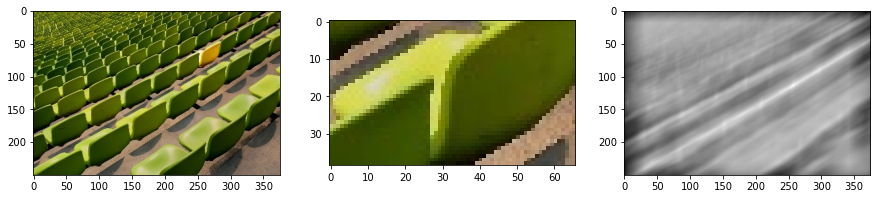

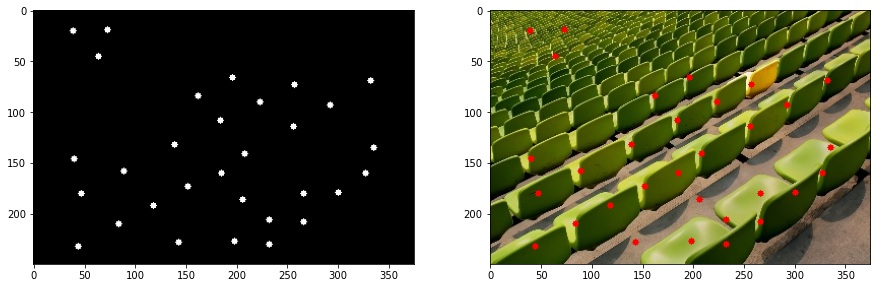

In [9]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'chairs.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[95:134, 224:290]
# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = lab1.normalized_cross_correlation_fast(img_pad, template)

lab1.show_imgs([img, template, response])


res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.5), int(template.shape[1] * 0.5)), threshold=0.8)
lab1.show_img_with_points(res, img_ori=img)


**Congrats! You have completed all tasks for lab 1.**